In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class AntColony:
    def __init__(self, distance_matrix, num_ants, num_iterations, alpha=1, beta=2, rho=0.5, q=1):
        self.distance_matrix = distance_matrix
        self.num_cities = len(distance_matrix)
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha  # Pheromone factor
        self.beta = beta  # Heuristic factor
        self.rho = rho  # Pheromone evaporation rate
        self.q = q  # Pheromone deposit factor

        # Initialize pheromone levels
        self.pheromone = np.ones((self.num_cities, self.num_cities))
        np.fill_diagonal(self.pheromone, 0)  # No pheromone on diagonal (no self loops)

        # Initialize best tour
        self.best_tour = None
        self.best_tour_length = np.inf

    def run(self):
        for i in range(self.num_iterations):
            all_tours = self.construct_solutions()
            self.update_pheromones(all_tours)

            # Update best tour
            for tour in all_tours:
                tour_length = self.get_tour_length(tour)
                if tour_length < self.best_tour_length:
                    self.best_tour_length = tour_length
                    self.best_tour = tour

        return self.best_tour, self.best_tour_length

    def construct_solutions(self):
        all_tours = []
        for _ in range(self.num_ants):
            tour = self.construct_solution()
            all_tours.append(tour)
        return all_tours

    def construct_solution(self):
        tour = [0]  # Start from city 0
        remaining_cities = set(range(1, self.num_cities))

        while remaining_cities:
            next_city = self.choose_next_city(tour[-1], remaining_cities)
            tour.append(next_city)
            remaining_cities.remove(next_city)

        return tour

    def choose_next_city(self, current_city, remaining_cities):
        probabilities = self.get_transition_probabilities(current_city, remaining_cities)
        return np.random.choice(list(remaining_cities), p=probabilities)

    def get_transition_probabilities(self, current_city, remaining_cities):
        pheromone = self.pheromone[current_city, list(remaining_cities)]
        heuristic = 1 / self.distance_matrix[current_city, list(remaining_cities)]
        probabilities = np.power(pheromone, self.alpha) * np.power(heuristic, self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def update_pheromones(self, all_tours):
        # Evaporate pheromones
        self.pheromone *= (1 - self.rho)

        # Deposit pheromones
        for tour in all_tours:
            tour_length = self.get_tour_length(tour)
            for i in range(self.num_cities - 1):
                city1, city2 = tour[i], tour[i+1]
                self.pheromone[city1, city2] += self.q / tour_length
                self.pheromone[city2, city1] += self.q / tour_length

    def get_tour_length(self, tour):
        tour_length = 0
        for i in range(self.num_cities - 1):
            city1, city2 = tour[i], tour[i+1]
            tour_length += self.distance_matrix[city1, city2]
        return tour_length

In [3]:
# Example usage:
# Define distance matrix (replace this with your own TSP data)
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

# Parameters
num_ants = 10
num_iterations = 100
alpha = 1
beta = 2
rho = 0.5
q = 1

In [4]:
# Initialize and run ACO
aco = AntColony(distance_matrix, num_ants, num_iterations, alpha, beta, rho, q)
best_tour, best_length = aco.run()
print("Best Tour:", best_tour)
print("Best Tour Length:", best_length)

Best Tour: [0, 1, 3, 2]
Best Tour Length: 65


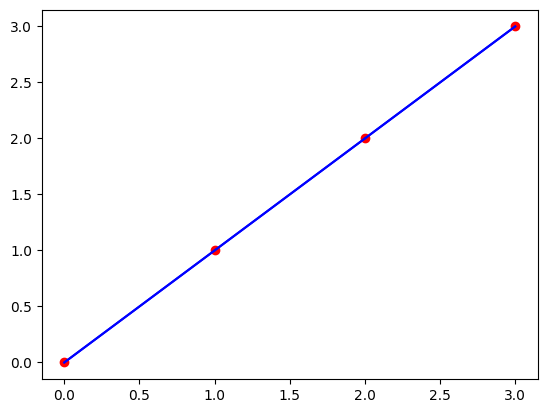

In [5]:
# Plot the best tour
def plot_tsp_solution(distance_matrix, tour):
    x = np.arange(len(tour))
    y = np.arange(len(tour))
    plt.plot(x, y, 'ro')  # Plot cities as red dots

    for i in range(len(tour) - 1):
        city1, city2 = tour[i], tour[i+1]
        plt.plot([x[city1], x[city2]], [y[city1], y[city2]], 'b-')  # Plot tour as blue lines
    plt.plot([x[tour[-1]], x[tour[0]]], [y[tour[-1]], y[tour[0]]], 'b-')  # Close the tour loop
    plt.show()

plot_tsp_solution(distance_matrix, best_tour)